In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import category_encoders as ce

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [9]:
# Load the dataset and show the first ten rows
df = pd.read_csv('Dataset2.csv')

In [10]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,NaN,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,NaN,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,NaN,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7034 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7040 non-null   object 
 8   InternetService   7034 non-null   object 
 9   OnlineSecurity    7042 non-null   object 
 10  OnlineBackup      7039 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7037 non-null   object 
 14  StreamingMovies   7040 non-null   object 
 15  Contract          7023 non-null   object 
 16  PaperlessBilling  7042 non-null   object 


# (1) Data Preprocessing

## Some preprocessing steps that should be performed:
- 1. Data cleaning (Removing any un-needed columns or duplicated rows).
- 2. Changing data type if needed.
- 3. Missing values imputation by mean (Numerical).
- 4. Missing values imputation be mode (Categorical).
- 5. Data transformation (dummy encoding).

### 1. Data cleaning (Removing any un-needed columns or duplicated rows)


In [12]:
# Checking for duplicated rows
df.duplicated().sum()
# There're no duplicated rows

0

In [13]:
# Dropping the column "customerID" 
df.drop(['customerID'], axis = 1, inplace = True)

### 2. Changing data type

In [14]:
# Changing Data Type ['total_charges'] From Object To Float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7034 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7040 non-null   object 
 7   InternetService   7034 non-null   object 
 8   OnlineSecurity    7042 non-null   object 
 9   OnlineBackup      7039 non-null   object 
 10  DeviceProtection  7041 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7037 non-null   object 
 13  StreamingMovies   7040 non-null   object 
 14  Contract          7023 non-null   object 
 15  PaperlessBilling  7042 non-null   object 
 16  PaymentMethod     7033 non-null   object 


In [15]:
# Checking how many null values in each column
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               9
PhoneService         0
MultipleLines        3
InternetService      9
OnlineSecurity       1
OnlineBackup         4
DeviceProtection     2
TechSupport          0
StreamingTV          6
StreamingMovies      3
Contract            20
PaperlessBilling     1
PaymentMethod       10
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 3. Missing values imputation by mean (Numerical)

In [17]:
cols_to_be_imputed = ['TotalCharges', 'tenure']

In [19]:
# Imputing Using Mean (Numerical Values)
for c in (cols_to_be_imputed):
     df[c].fillna(df[c].mean(), inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,NaN,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,NaN,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,NaN,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 4. Missing values imputation be mode (Categorical)

In [20]:
cols_to_be_imputed2 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

In [23]:
# Imputing Using Mode (Categorical Values)
mode_imputer = SimpleImputer(strategy = 'most_frequent')
df[cols_to_be_imputed2] = mode_imputer.fit_transform(df[cols_to_be_imputed2])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,No,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# After dealing with all the missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [27]:
df.describe(include = 'object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3392,3097,3499,3089,3096,3473,2815,2787,3884,4172,2368,5174


### 5. Data transformation (using dummy encoding)

In [29]:
df_copy = df.copy()

In [30]:
# Remove Categorical Columns 
df_copy_numerical_features = df_copy.drop(categorical_features, axis=1)

# Encode Categorical Columns 
df_copy_categorical_features = pd.get_dummies(data = df_copy[categorical_features], drop_first=True)

# Add Dummy Encoded Columns To Numerical Columns 
df_copy = pd.concat([df_copy_numerical_features, df_copy_categorical_features], axis=1)
df_copy

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1.0,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34.0,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2.0,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45.0,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24.0,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72.0,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11.0,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4.0,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


# (2) The DashBoard

In [55]:
import pandas as pd
import plotly.express as px
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html

# Create Dash app
app = dash.Dash(__name__)

# Define dropdown options
dropdown_options1 = [
    {'label': 'PaymentMethod', 'value': 'PaymentMethod'},
    {'label': 'InternetService', 'value': 'InternetService'},
    {'label': 'Tenure', 'value': 'tenure'}
]
dropdown_options2 = [{'label': col, 'value': col} for col in df.columns]

# Define app layout
app.layout = html.Div(children=[
    html.H1(children='Customer Churn Analysis'),
    
    # Dropdown 1
    dcc.Dropdown(
        id='dropdown-1',
        options=dropdown_options1,
        value='PaymentMethod'
    ),
    
    # Dropdown 2
    dcc.Dropdown(
        id='dropdown-2',
        options=[
            {'label': 'MonthlyCharges', 'value': 'MonthlyCharges'},
            {'label': 'TotalCharges', 'value': 'TotalCharges'}
        ],
        value='MonthlyCharges'
    ),
    
    # Column chart
    dcc.Graph(
        id='column-chart',
        figure={}
    ),
    
    # Dropdown 3
    dcc.Dropdown(
        id='dropdown-3',
        options=dropdown_options2,
        value='Churn'
    ),
    
    # Pie chart
    dcc.Graph(
        id='pie-chart',
        figure={}
    )
])

# Define callback function to update charts
@app.callback(
    [dash.dependencies.Output('column-chart', 'figure'),
     dash.dependencies.Output('pie-chart', 'figure')],
    [dash.dependencies.Input('dropdown-1', 'value'),
     dash.dependencies.Input('dropdown-2', 'value'),
     dash.dependencies.Input('dropdown-3', 'value')]
)
def update_charts(var1, var2, var3):
    # Create column chart
    fig1 = px.histogram(df, x=var1, y=var2, barmode='group')
    
    # Create pie chart
    fig2 = px.pie(df, names=var3)
    
    # Return both figures
    return fig1, fig2

if __name__ == '__main__':
    app.run_server(debug=False,port=8080)

Dash is running on http://127.0.0.1:8080/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [13/May/2023 19:00:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:00:40] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_9_1m1680074716.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:00:40] "GET /_dash-component-suites/dash/deps/react@16.v2_9_1m1680074716.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:00:40] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_1m1680074716.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:00:40] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_9_1m1680074716.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:00:40] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_9_1m1680074716.min.js HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:00:40] "GET /_dash-component-suites/dash/dcc/dash_core_components.v2_9_0m1680074716.js HTTP/1.1" 200 -
127.0.0.1 - - [13/May/2023 19:00:40] "GET /_dash-component-suites/d

# (3) Describing the dataset and defining the most important insights

## Describe the dataset and show:
- a. The type of distribution of the data.
- b. If there are any outliers in the data, show them.
- c. Show the top three columns containing high variety in the number of categories in case of there are categorical features in the data; or the top three columns with the highest variance in case of all features were numeric.
- d. If there are any correlations between variables.

## a. The type of distribution of the data

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.370344,64.761692,2283.300441
std,0.368612,24.549356,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


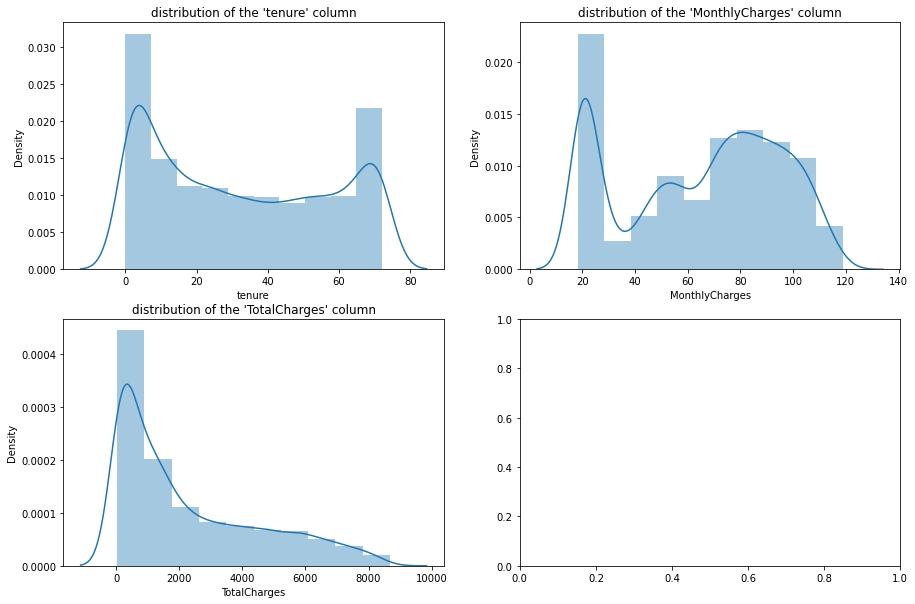

In [40]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df['tenure'] , bins = 10, ax = axis[0,0]).set_title("distribution of the 'tenure' column")
sns.distplot(df['MonthlyCharges'] , bins = 10, ax = axis[0,1]).set_title("distribution of the 'MonthlyCharges' column")
sns.distplot(df['TotalCharges'] , bins = 10, ax = axis[1,0]).set_title("distribution of the 'TotalCharges' column");

#fig, axis = plt.subplots(1, 2, figsize=(15, 5))
#sns.violinplot(x = df['tenure'], ax = axis[0])
#sns.violinplot(x = df['MonthlyCharges'], ax = axis[1]);

## Based on the three plots obove, we can clearly see that our data has a non-normal distribution. And to specify, it is more of a Bimodal, Multimodal distribution, or Right skewed distribution.
#### Note: the 'SeniorCitizen' column is more of a categorical attribute since it only holds one of two values (0 or 1)  

## b. If there are any outliers in the data, show them.
### There are no outliers in the data. The Max values from the columns 'tenure' and 'MonthlyCharges' are reasonably placed from the 75th percentile (3rd quartile).

## c. Show the top three columns containing high variety in the number of categories in case of there are categorical features in the data; or the top three columns with the highest variance in case of all features were numeric.

In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.370344,64.761692,2283.300441
std,0.368612,24.549356,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [34]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3392,3097,3499,3089,3096,3473,2815,2787,3884,4172,2368,5174


## The top three categorical columns containing high variety in the number of categories are:
- 1. 'PaymentMethod' with a total of 4 unique values.
- 2. 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup,' 'DeviceProtection,' 'TechSupport,' 'StreamingTV', 'StreamingMovies', and 'Contract' columns with a total of 3 unique values.
- 3. The rest of the columns have only 2 unique values each.

## The top three numeric columns with the highest variance are:
- 1. 'TotalCharges' with std = 2265.000258
- 2. 'MonthlyCharges' with std = 30.090047
- 3. 'tenure' with std = 24.565058
- 4. 'SeniorCitizen' with std = 0.368612 (but it shouldn't be considered a numeric column. check the note above in point a.)

## d. Show if there are any correlations between variables

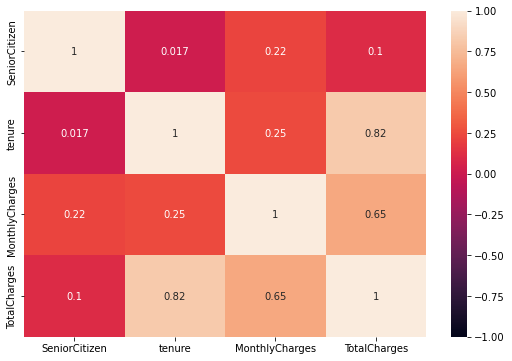

In [36]:
plt.figure(figsize = (9 ,6))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

### There's a strong direct positive relationship (+ve correlation) between the columns
- 'TotalCharges' and 'tenure'
- 'TotalCharges' and 'MonthlyCharges'

### There'a a weak relationship between the columns
- 'MonthlyCharges' and 'SeniorCitizen'
- 'MonthlyCharges' and 'tenure'
- 'SeniorCitizen' and 'tenure'
- 'SeniorCitizen' and 'TotalCharges'

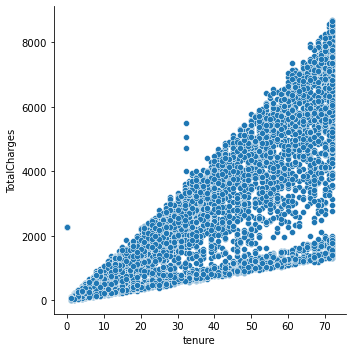

In [54]:
sns.relplot(data = df, x = 'tenure', y = 'TotalCharges');

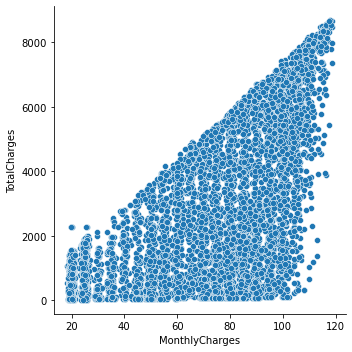

In [46]:
sns.relplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges');

## Define the most important insights and takeaways from the data

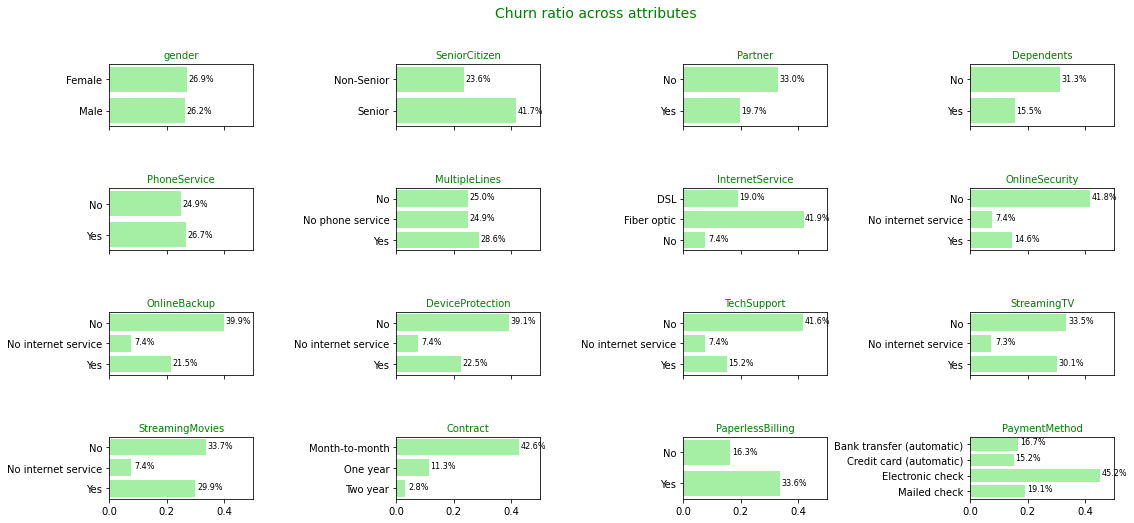

In [57]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: "Senior" if x==1 else ("Non-Senior" if x==0 else x))

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(4,4,figsize=(18,8), sharex=True)
j, k = 0, 0
    
for i in cols:
    temp = df.pivot_table(df, index=[i], columns=['Churn'], aggfunc=len).reset_index()[[i,'tenure']]
    temp.columns=[i,'Churn_N','Churn_Y']
    temp['Churn_ratio']=(temp['Churn_Y'])/(temp['Churn_Y']+temp['Churn_N'])
    
    a = sns.barplot(x='Churn_ratio', y=i, data=temp, ax=ax[j][k], color="palegreen")
    a.set_yticklabels(labels=temp[i])
    for p in ax[j][k].patches:
        ax[j][k].text(p.get_width() + .05, p.get_y() + p.get_height()/1.5, '{:,.1%}'.format(p.get_width()),
                   fontsize=8, color='black', ha='center', va='bottom')
    ax[j][k].set_xlabel('', size=8, color="green")
    ax[j][k].set_ylabel('', size=8, color="green", rotation=0, horizontalalignment='right')
    ax[j][k].set_title(i, size=10, color="green")

    if k==3: 
        j=j+1
        k=0
    else:
        k=k+1 
    
fig.suptitle("Churn ratio across attributes", fontsize=14, family='sans-serif', color="green")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=1, hspace=1)
plt.xlim(0,.5)
plt.show()

## Some insights and takeaways:

- 45% of the users are paying via electronic check churn.
- 43% of the users are under month-to-month contract churn.
- 42% of the users have fiber optic internet churn.
- 42% of the users have no online security churn.
- 42% of the users are opting no for TechSupport churn.
- 42% of the senior citizen users churn.
- 40% of the users with no OnlineBackup churn.
- 39% of the users with no DeviceProtection churn.
- The more the tenure is, the lesser is the churn ratio.
- The higher the monthly charge is, the higher is the churn.
- Churned data points are concentrated in high monthly charges and low tenure.
- Not churned data points are concentrated in (low monthly charges & low tenure) and (high monthly charges & high tenure).